<a href="https://colab.research.google.com/github/Dhruv1603/visualization/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib VS Seaborn VS Plotly

### Using following Grpahs:
Pair Plot<br>
Scatter Plot<br>
Histogram

## Matplotlib

In [1]:
# Import required Lib

import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix

In [2]:
# Load the Iris dataset

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
species_names = iris.target_names

In [3]:
# Display the first few rows of the dataset

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


<ipython-input-4-7886b8f94cc4>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i, j].scatter(data[data['species']==species].iloc[:, j],


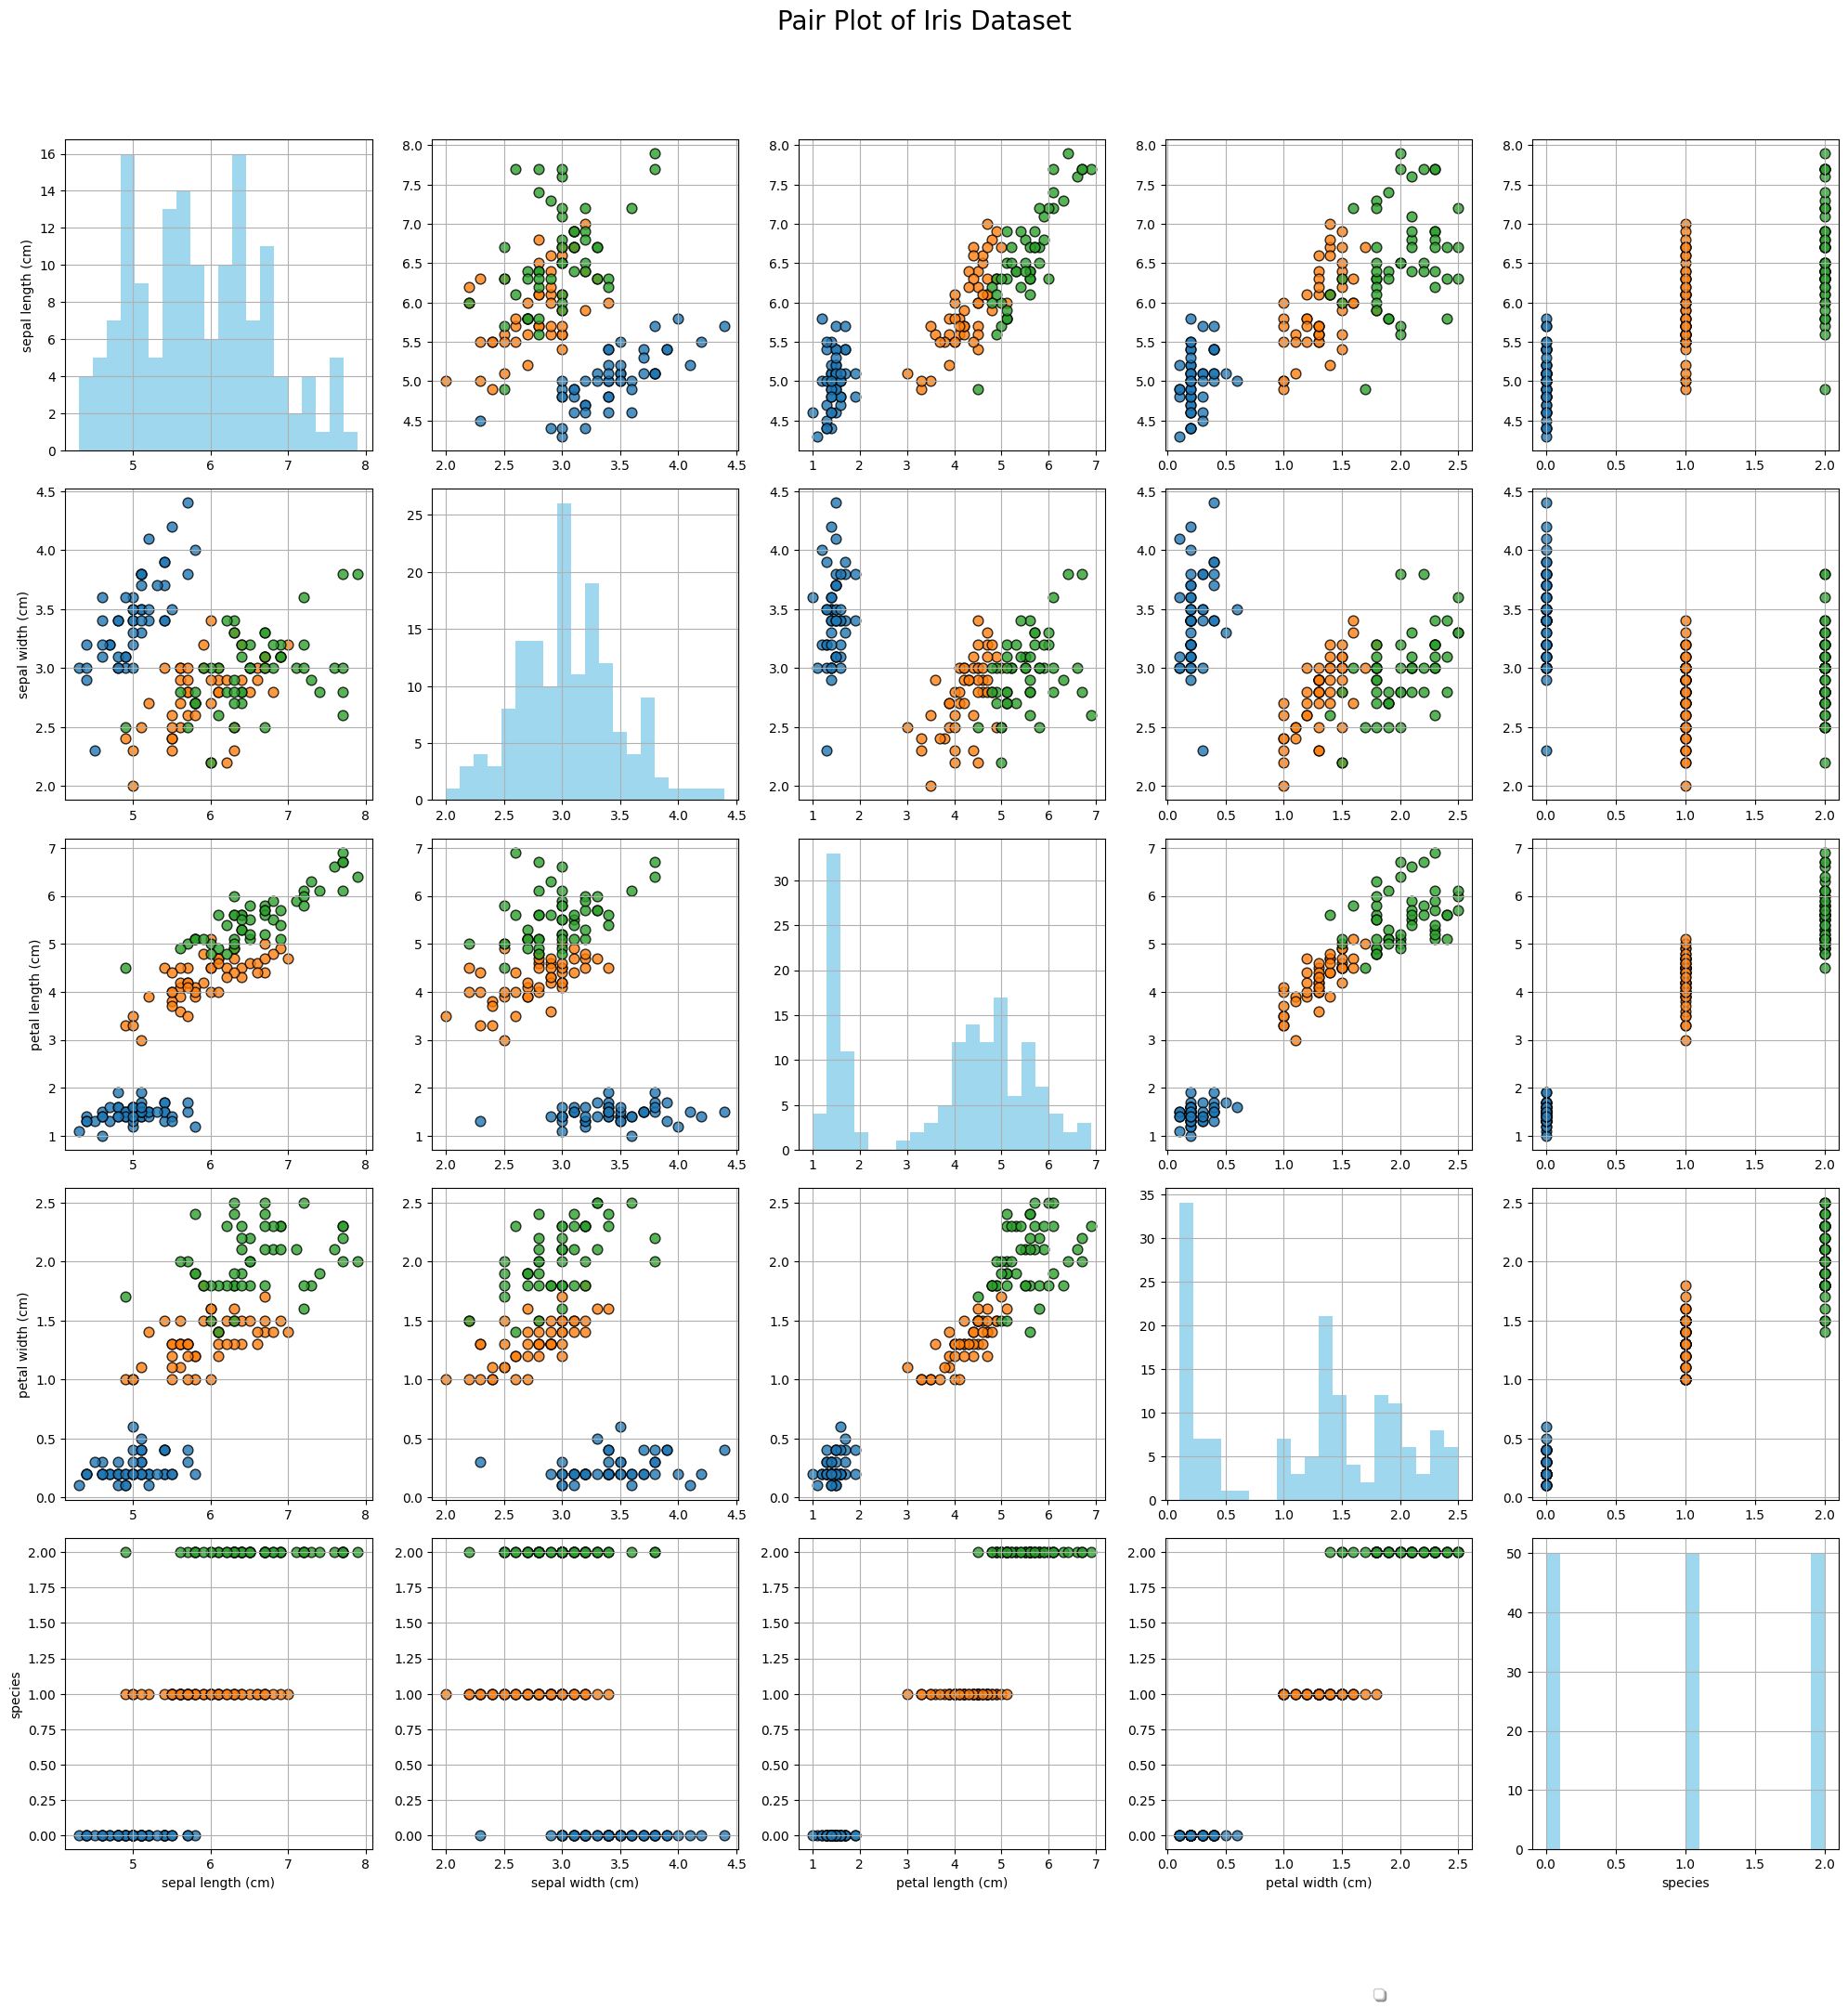

In [4]:
# Pair Plot using Matplotlib

def pair_plot(data, size=4):
    num_vars = data.shape[1]
    fig, axes = plt.subplots(num_vars, num_vars, figsize=(size*num_vars, size*num_vars))
    for i in range(num_vars):
        for j in range(num_vars):
            if i == j:
                axes[i, j].hist(data.iloc[:, i], bins=20, color='skyblue', alpha=0.8)
            else:
                for species in data['species'].unique():
                    axes[i, j].scatter(data[data['species']==species].iloc[:, j],
                                       data[data['species']==species].iloc[:, i],
                                       label=iris.target_names[species],
                                       cmap='viridis', edgecolor='black', s=60, alpha=0.8)
            if i == num_vars - 1:
                axes[i, j].set_xlabel(data.columns[j])
            if j == 0:
                axes[i, j].set_ylabel(data.columns[i])
            axes[i, j].grid(True)

    plt.suptitle('Pair Plot of Iris Dataset', y=1.02, fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.legend(loc='lower center', bbox_to_anchor=(-0.5, -0.5), shadow=True, ncol=3)

pair_plot(iris_df)
plt.show()

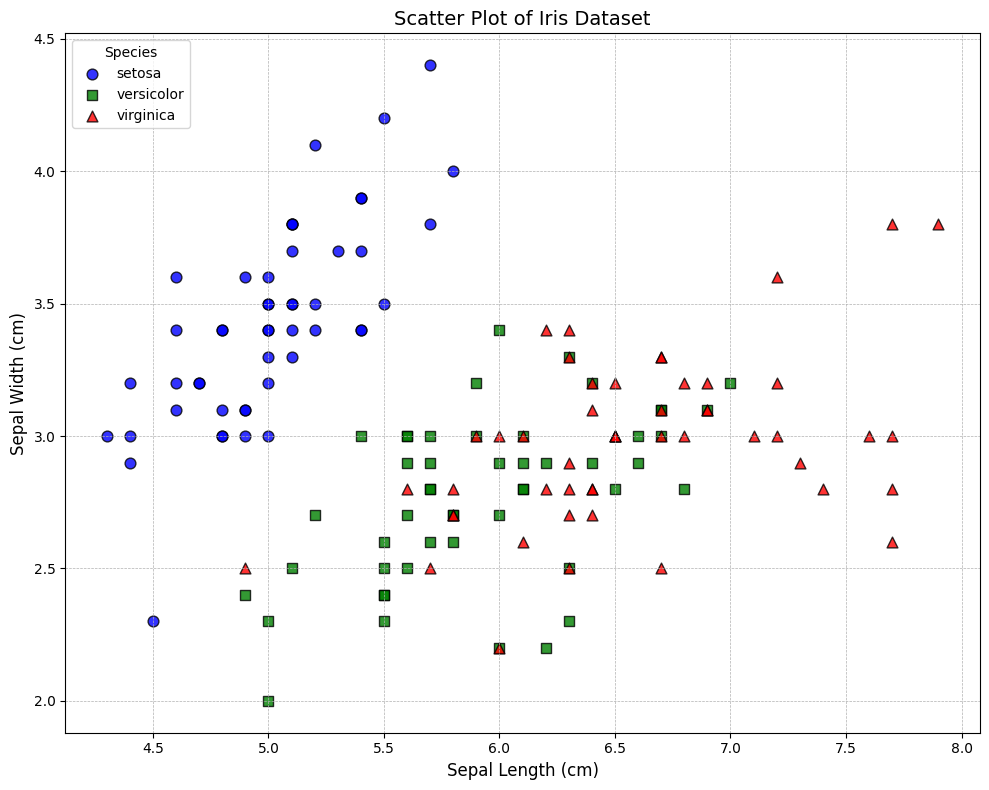

In [5]:
# Scatter Plot using Matplotlib

plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
markers = ['o', 's', '^']
for i, species in enumerate(iris.target_names):
    x = iris_df[iris_df['species'] == i]['sepal length (cm)']
    y = iris_df[iris_df['species'] == i]['sepal width (cm)']
    plt.scatter(x, y, color=colors[i], marker=markers[i], label=species, s=60, alpha=0.8, edgecolor='black')
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.title('Scatter Plot of Iris Dataset', fontsize=14)
plt.legend(title='Species', loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

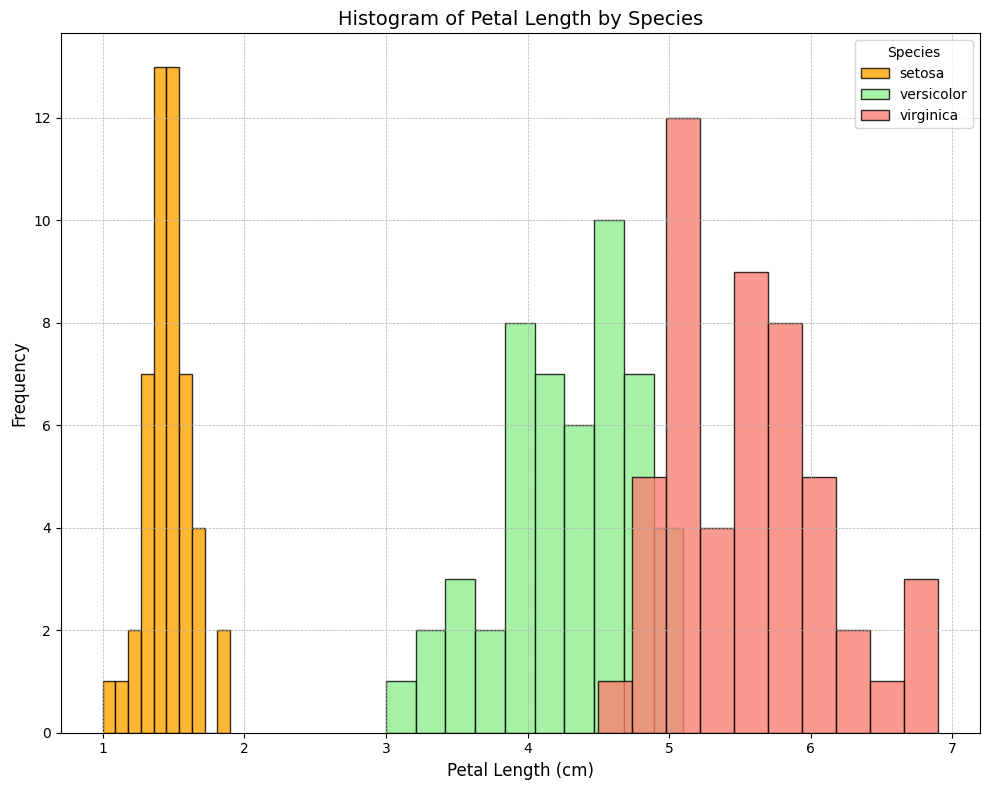

In [6]:
# Histogram using Matplotlib

plt.figure(figsize=(10, 8))
colors = ['orange', 'lightgreen', 'salmon']
for i, species in enumerate(species_names):
    plt.hist(iris_df[iris_df['species'] == i]['petal length (cm)'],
             bins=10, color=colors[i], alpha=0.8, label=species, edgecolor='black')
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Petal Length by Species', fontsize=14)
plt.legend(title='Species', loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Seaborn

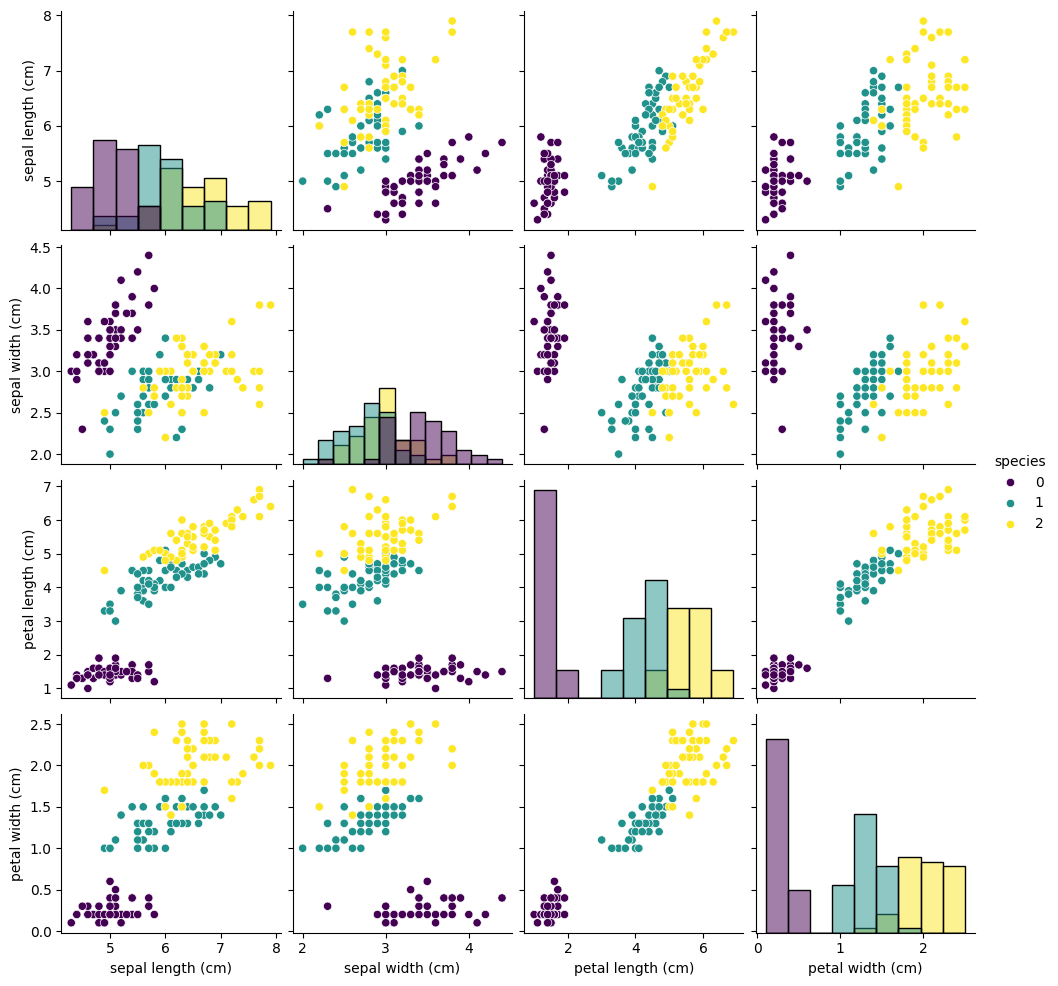

In [7]:
# Pair Plot using Seaborn

sns.pairplot(iris_df, hue='species', palette='viridis',diag_kind='hist')
plt.show()

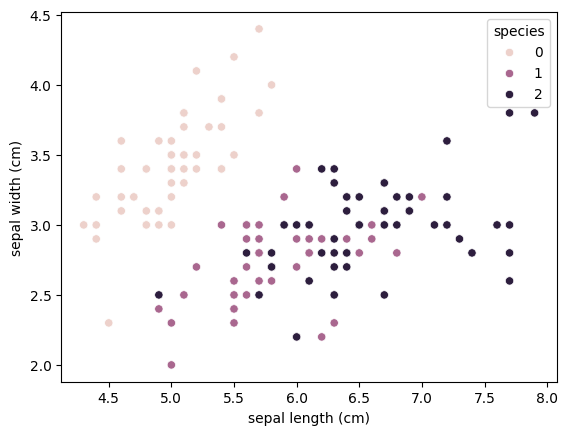

In [8]:
# Scattor Plot using Seaborn

sns.scatterplot(data=iris_df,x="sepal length (cm)", y="sepal width (cm)", hue="species")
plt.show()

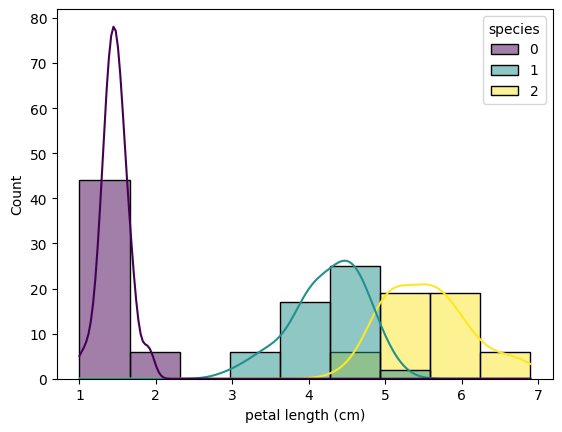

In [9]:
# Histogram using Seaborn

sns.histplot(data=iris_df, x="petal length (cm)", hue="species", palette="viridis", kde=True)
plt.show()

## Plotly

In [10]:
!pip install plotly kaleido

In [14]:
# Pair PLot using Plotly

fig1 = px.scatter_matrix(iris_df, dimensions=iris.feature_names, color="species",
                        title="Pair Plot of Iris Dataset")
pio.write_image(fig1, 'pair_plot.png')
fig1.show()

In [15]:
# Scattorplot using Plotly

fig2 = px.scatter(iris_df, x="sepal length (cm)", y="sepal width (cm)", color="species", title="Scatter Plot of Iris Dataset")
pio.write_image(fig2, 'scatterplot.png')
fig2.show()

In [23]:
# Histogram using PLotly

fig3 = px.histogram(iris_df, x="petal length (cm)", color="species", title="Histogram of Petal Length by Species")
pio.write_image(fig3, 'histogram.png')
fig3.show()

# Thank You